In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import time
#modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


#from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [11]:
df = pd.read_csv('agaricus-lepiota.csv')

In [12]:
df.rename(columns = { 'p': 'poisonous', 'x':'cap_shape', 's': 'cap_surface','n':'cap_color',
                     't': 'bruises', 'p.1': 'odor', 'f': 'gill_attachment',
                     'c': 'gill_spacing', 'n.1': 'gill_size', 'k': 'gill_color',
                     'e': 'stalk_shape', 'e.1': 'stalk_root', 's.1': 'stalk_surface_above_ring',
                     's.2': 'stalk_surface_below_ring', 's.2': 'stalk_surface_below_ring',
                     'w': 'stalk_color_above_ring', 'w.1':'stalk_color_below_ring', 'p.2':'veil_type',
                     'w.2': 'veil_color', 'o': 'ring_number', 'p.3': 'ring_type', 'k.1':'spore_print_color',
                     's.3': 'population', 'u': 'habitat'}, inplace = True)

In [13]:



#features X
df['cap_shape'] = df['cap_shape'].replace(['b','c','x','f'], ['bell','conical', 'convex', 'flat'])
df['cap_surface'] = df['cap_surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly','smooth'])
df['cap_color'] = df['cap_color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon','gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'])
df['bruises'] = df['bruises'].replace(['t', 'f'], ['yes', 'no'])
df['odor'] = df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'])
df['gill_attachment'] = df['gill_attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'])
df['gill_spacing'] = df['gill_spacing'].replace([ 'c', 'w', 'd'], ['close', 'crowded', 'distant'])
df['gill_size'] = df['gill_size'].replace([ 'b', 'n'], ['broad', 'narrow'])
df['gill_color'] = df['gill_color'].replace([ 'k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'])
df['stalk_shape'] = df['stalk_shape'].replace([ 'e', 't'], ['enlarging', 'tapering'])
df['stalk_root'] = df['stalk_root'].replace(['b', 'c', 'u', 'e', 'z', 'r', '?'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing'])
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['veil_type'] = df['veil_type'].replace([ 'p', 'u'], ['partial', 'universal'])
df['veil_color'] = df['veil_color'].replace([ 'n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'])
df['ring_number'] = df['ring_number'].replace([ 'n', 'o', 't'], ['none', 'one', 'two'])
df['ring_type'] = df['ring_type'].replace([ 'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'])
df['spore_print_color'] = df['spore_print_color'].replace([ 'k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'])
df['population'] = df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'])
df['habitat'] = df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])


In [14]:
#target y 

#1 is poisonous 0 is edible
df['poisonous'] = df['poisonous'].replace(['e', 'p'], [0 , 1])

In [15]:
df.shape

(8123, 23)

In [16]:
def plotdata(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc = {'figure.figsize': (8, 6)})
        x = sns.countplot(x= data[col], hue = hue, data = data)

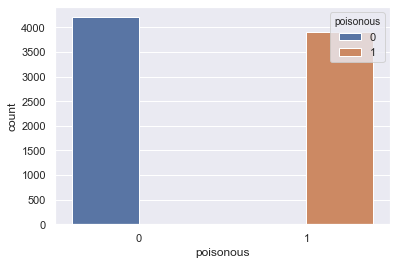

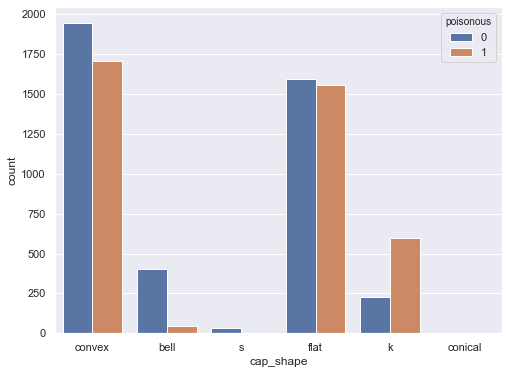

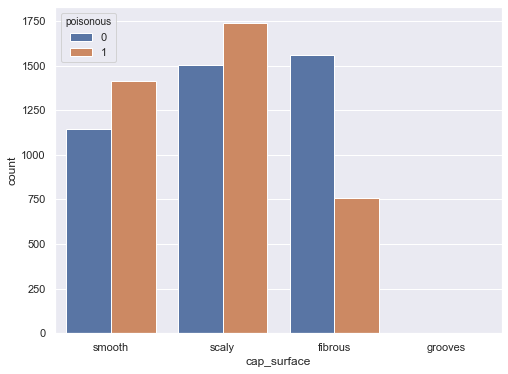

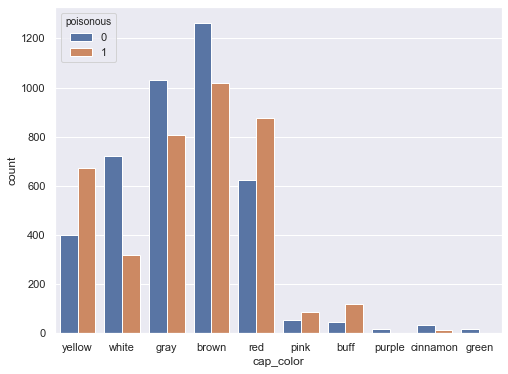

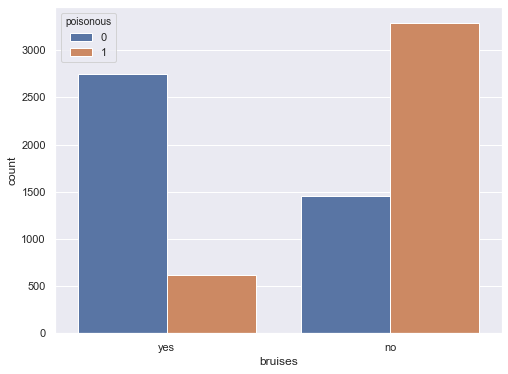

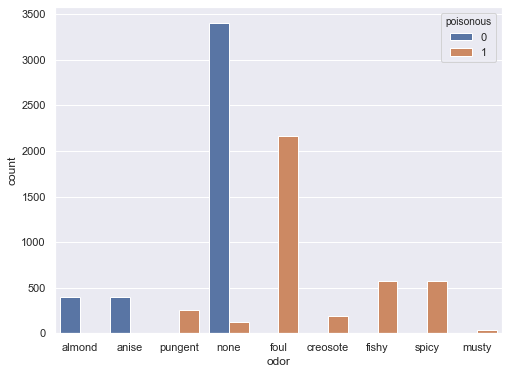

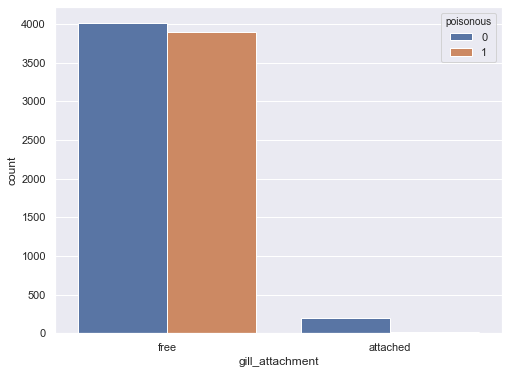

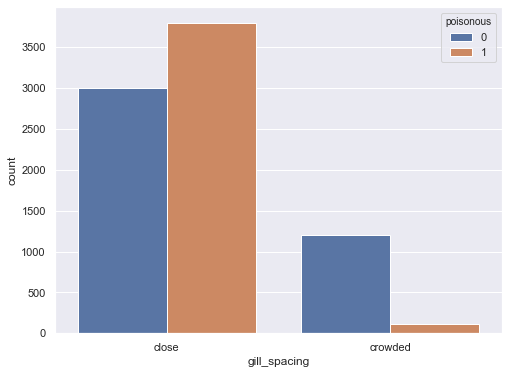

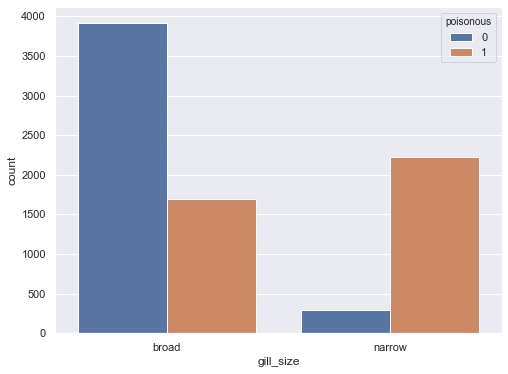

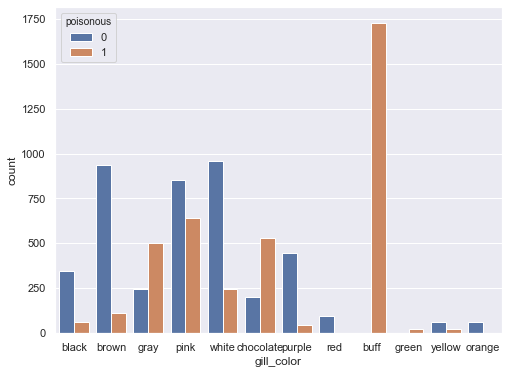

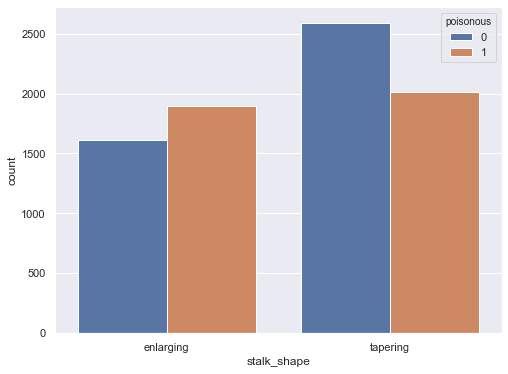

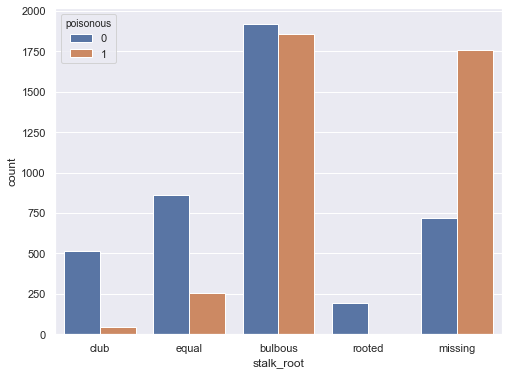

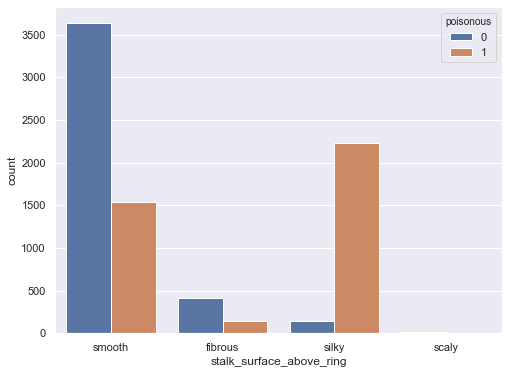

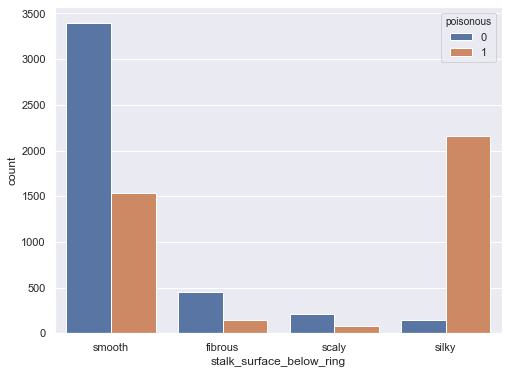

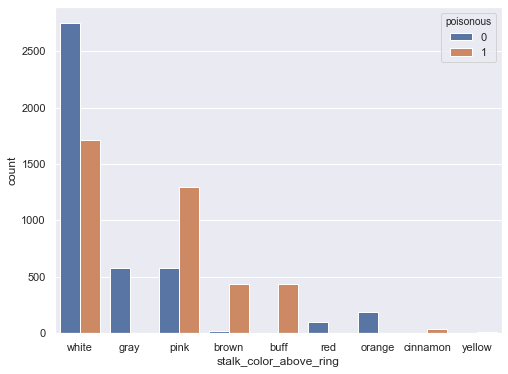

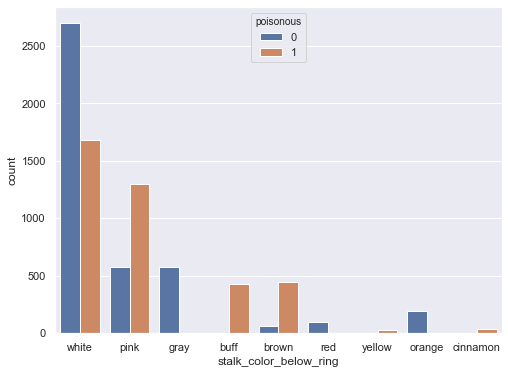

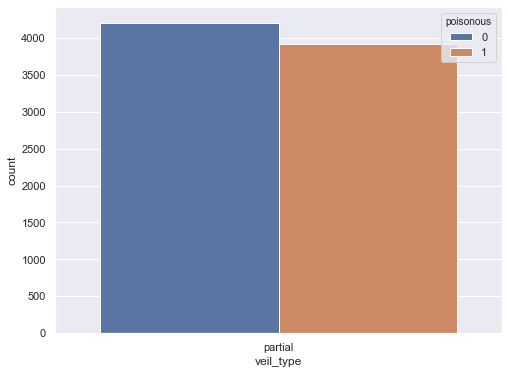

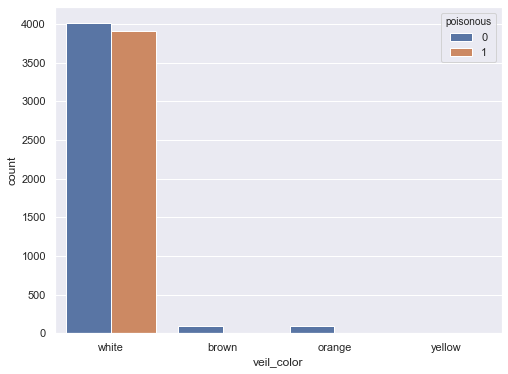

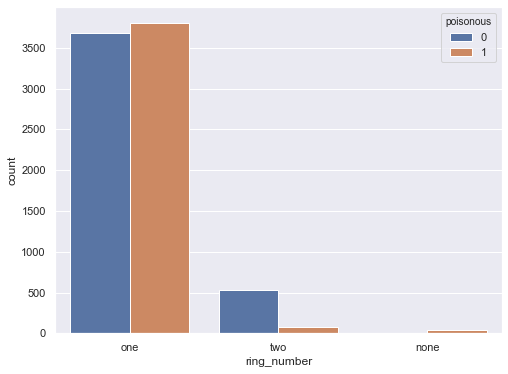

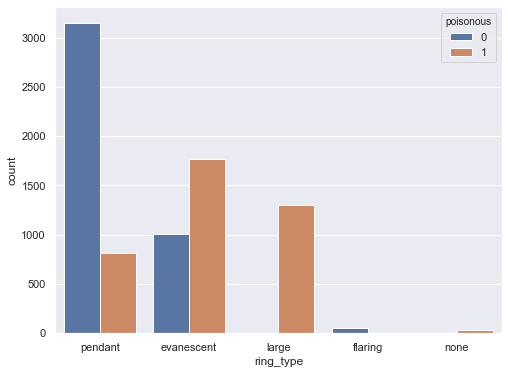

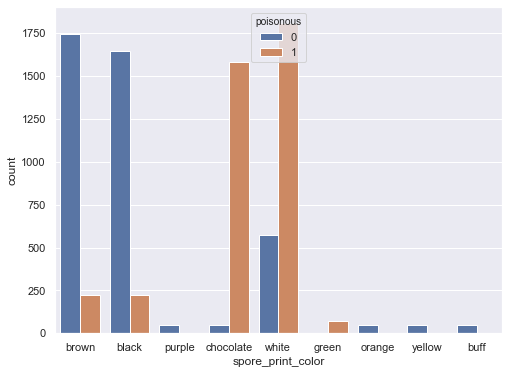

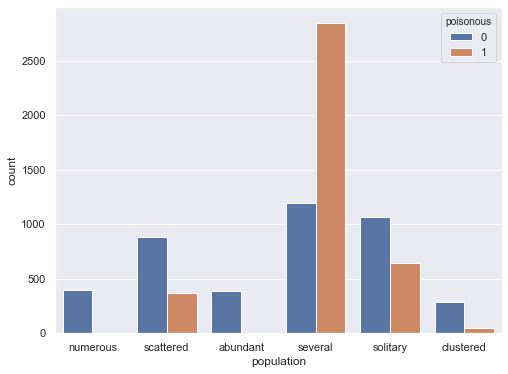

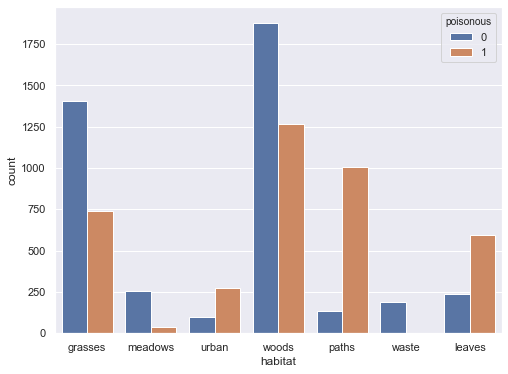

In [17]:
plotdata(df['poisonous'], df)

 - Columns to drop: 
 
     - veil_type : only contains 1 value, 'partial'
     - stalk_root: contains 2480 missing values
     - poisonous (target)

In [18]:
df_dropped = df.drop(columns = ['veil_type', 'stalk_root', 'poisonous'])

In [19]:
df_dropped.shape

(8123, 20)

In [20]:
X = pd.get_dummies(df_dropped)

In [21]:
y = df['poisonous']

In [35]:
#X.head()
y.head()

0    0
1    0
2    1
3    0
4    0
Name: poisonous, dtype: int64

# Decision Tree 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [37]:
# Instantiate and fit initial DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

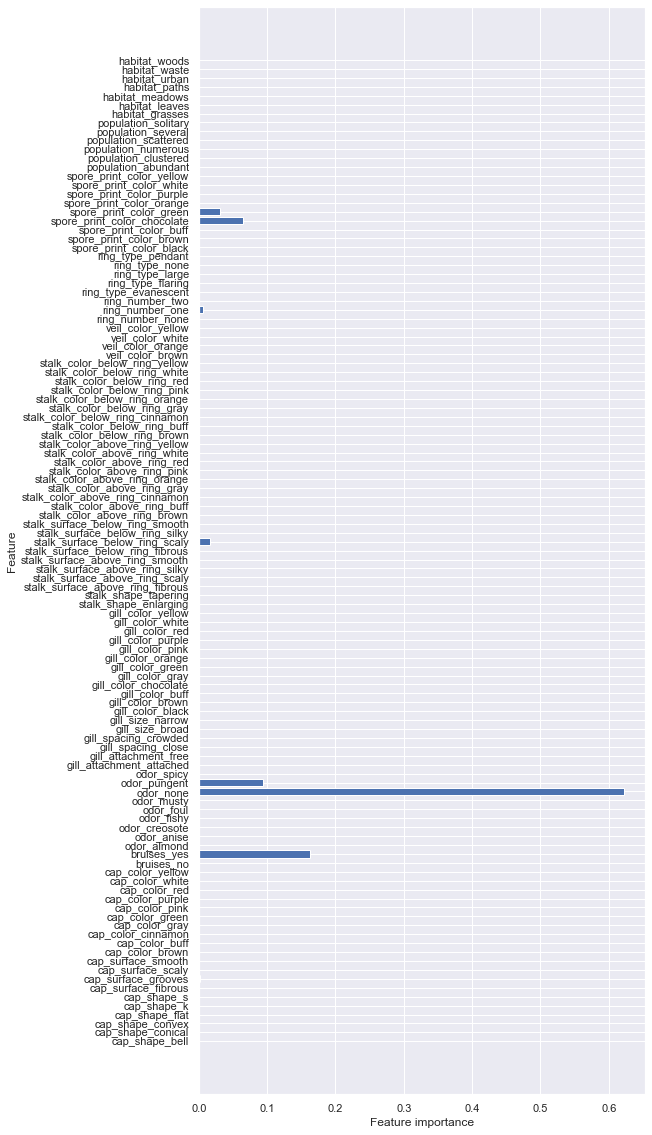

In [39]:
plot_feature_importances(tree_clf)

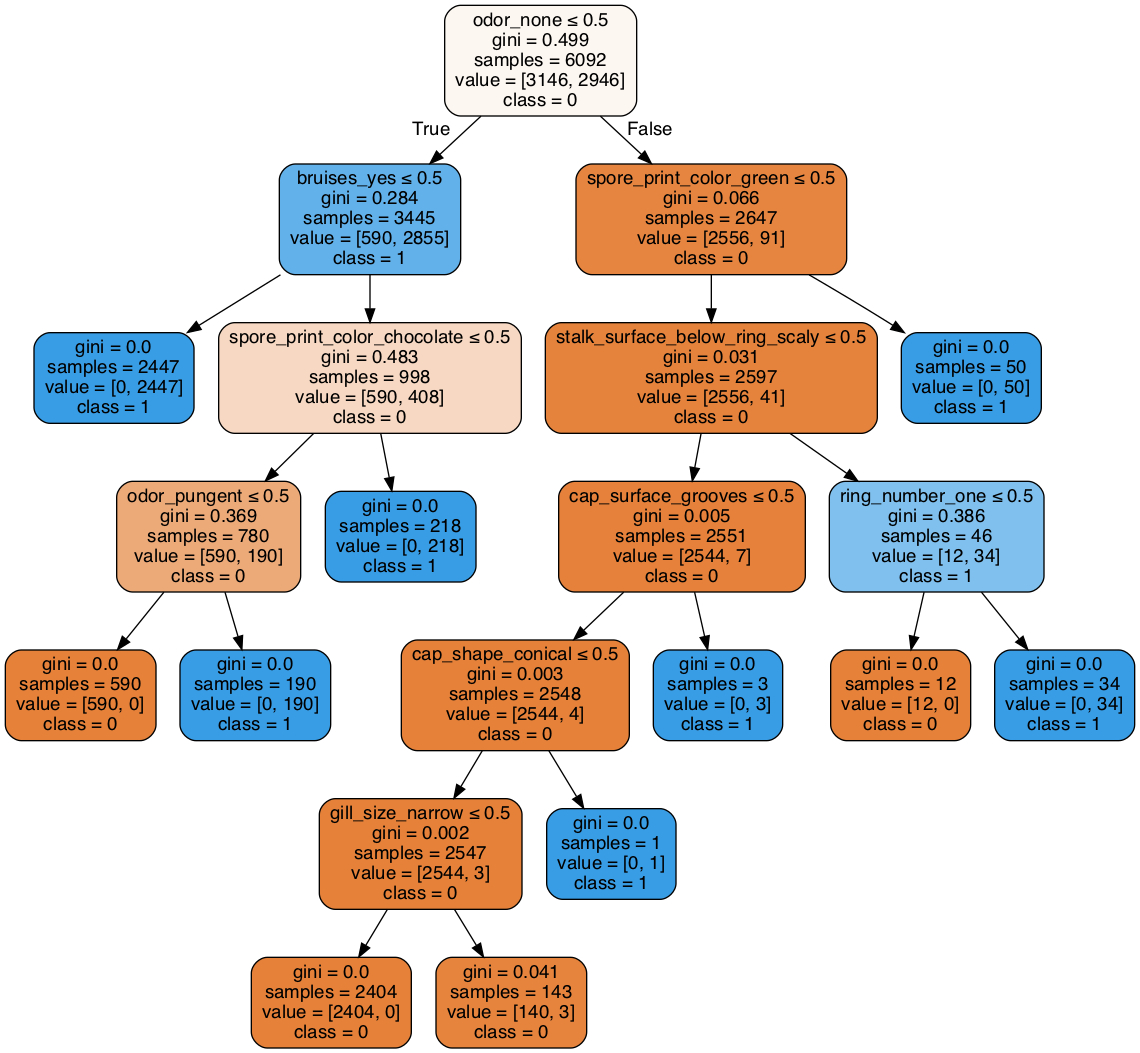

In [40]:
#Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# # Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [41]:
pred = tree_clf.predict(X_test)

In [44]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


# Random Forest

In [183]:
# Instantiate Classifier
forest = RandomForestClassifier(n_estimators = 5, max_depth = 5, max_features = 15)

In [186]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
forest.score(X_train, y_train)

0.9937623112278398

In [187]:
forest.score(X_test, y_test)

0.9911373707533235

In [169]:
CV = GridSearchCV(forest, param_grid, scoring= 'accuracy', cv = None, n_jobs =1)

In [171]:
CV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             

In [ ]:
param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['auto'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy'] 
}

In [172]:
best_parameters1 = CV.best_params_

In [173]:
best_parameters1

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 400}

In [189]:
# Instantiate Classifier
forest = RandomForestClassifier(n_estimators = 400, max_depth = 7, max_features = 'auto', criterion = 'gini')

In [191]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
forest.score(X_train, y_train)

1.0

In [193]:
forest.score(X_test, y_test)

1.0

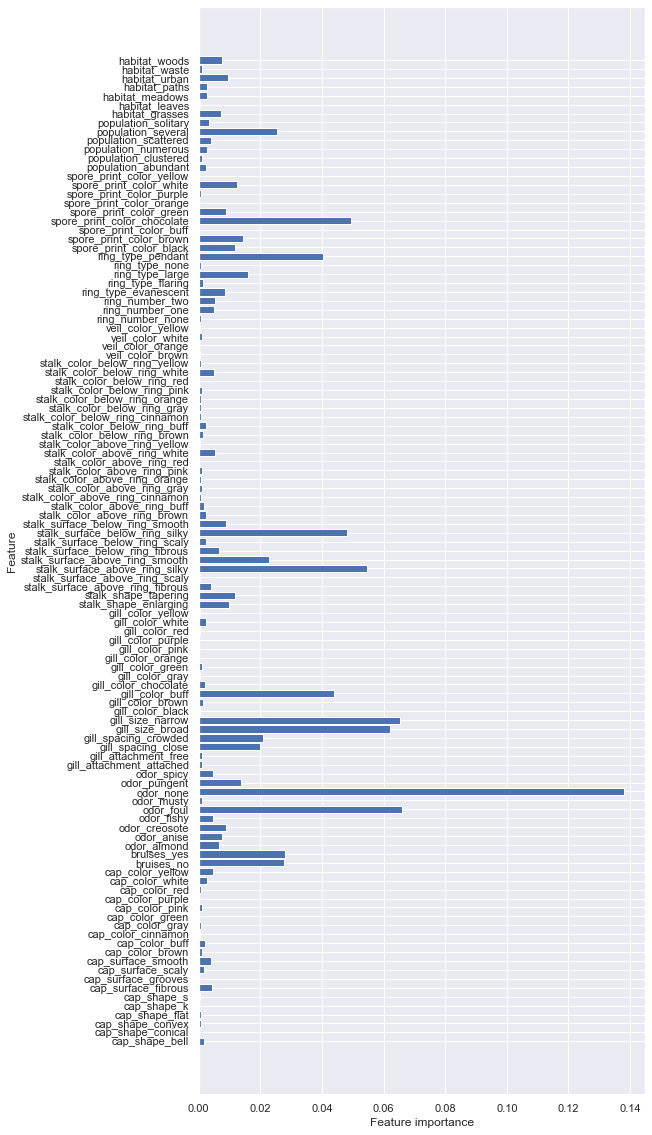

In [194]:
plot_feature_importances(forest)

In [197]:
pred = forest.predict(X_test)

In [198]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


In [199]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       1.00      1.00      1.00       969

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Random Forest 2

In [200]:
forest_2 = RandomForestClassifier(n_estimators = 5 , max_features = 10 , max_depth = 3)

In [201]:
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

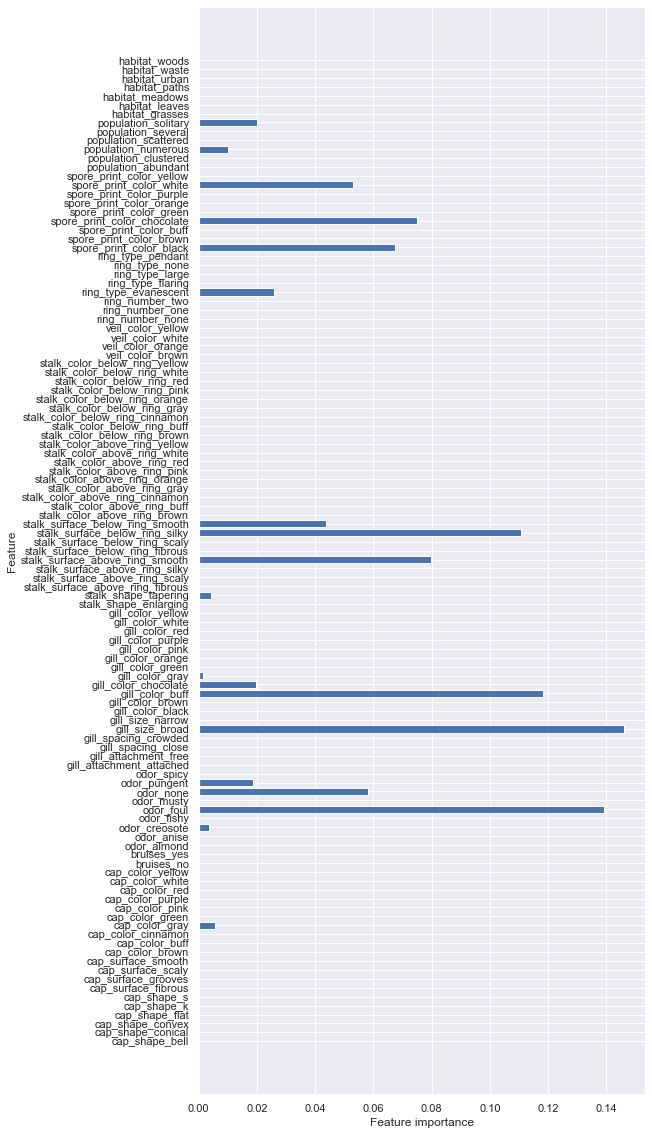

In [202]:
plot_feature_importances(forest_2)

In [147]:
rf_tree_1 = forest_2.estimators_[0]
rf_tree_2 = forest_2.estimators_[1]
rf_tree_3 = forest_2.estimators_[2]
rf_tree_4 = forest_2.estimators_[3]
rf_tree_5 = forest_2.estimators_[4]

In [220]:
rf_tree_1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1814912295, splitter='best')

In [151]:
forest_2.estimators_[0].get_params().keys()


dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [203]:
print(forest_2.score(X_train, y_train))
print(forest_2.score(X_test, y_test))

0.9604399212081418
0.9630723781388478


In [204]:
forest2_pred = forest_2.predict(X_test)

In [205]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest2_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, forest2_pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :0.96

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1054,8,1062
1,67,902,969
All,1121,910,2031


In [206]:
print(classification_report(y_test, forest2_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1062
           1       0.99      0.93      0.96       969

    accuracy                           0.96      2031
   macro avg       0.97      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [207]:

cm = confusion_matrix(y_test,forest2_pred)
classes = ['Edible', 'Poisonous']

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [2]:
sklearn.metrics.plot_confusion_matrix()

NameError: name 'sklearn' is not defined

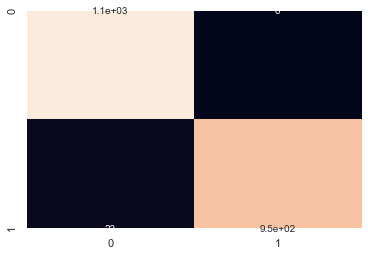

In [224]:
sns.heatmap(matrix, annot = True, cbar = False)

# Limit Features Test

In [115]:
X2 = X[['bruises_no', 'odor_foul', 'odor_fishy', 'odor_spicy', 'gill_color_buff', 'stalk_surface_above_ring_silky', 'stalk_surface_below_ring_silky', 'ring_type_large', 'spore_print_color_chocolate']]

In [117]:
X2.shape

(8123, 9)

In [118]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .25, random_state = 42)

In [133]:
forest_3 = RandomForestClassifier(n_estimators = 100 , max_features = 5, max_depth = 5)

In [134]:
forest_3.fit(X2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
forest_3.score(X2_train, y_train)

0.9233420879842417

In [136]:
forest_3.score(X2_test, y_test)

0.9330379123584441

In [153]:
forest_3.estimators_[0].get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [154]:
param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['auto'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy'] 
}






In [155]:
CV = GridSearchCV(forest_3, param_grid, scoring= 'accuracy', cv = None, n_jobs =1)

In [160]:
CV.fit(X2_train, y_train)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn',

In [161]:
best_parameters = CV.best_params_

In [162]:
best_parameters

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [163]:
forest_4 = RandomForestClassifier(criterion = 'gini', n_estimators = 100 , max_features = 'auto', max_depth = 6)

In [164]:
forest_4.fit(X2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
print(forest_4.score(X2_train, y_train))
print(forest_4.score(X2_test, y_test))

0.9246552856204859
0.9271294928606598


# Naive Bayes

In [26]:
GXtrain, GXtest, gy_train, gy_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [27]:
gnb = GaussianNB()

In [28]:
gnb.fit(GXtrain, gy_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred = gnb.fit(GXtrain, gy_train).predict(GXtest)

array([1, 0, 1, ..., 0, 1, 0])

In [32]:
print("Number of mislabeled points out of a total %d points : %d"
    (GXtest.shape[0], (gy_test != y_pred).sum()))

TypeError: 'str' object is not callable

# SVM 

In [214]:
from sklearn.svm import SVC  
#tic = time()
svclassifier = SVC(kernel='rbf', C=1000)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
#toc = time()
#print("run time is {} seconds".format(toc-tic))

In [215]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[1062    0]
 [   0  969]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       1.00      1.00      1.00       969

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

The accuracy score is 1.0
